In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
mall_df = pd.read_csv(r'C:\Users\taewoo\Desktop\Datasets\mall_customers.csv')
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Clustering by gender and age

In [4]:
from sklearn import preprocessing

# first, have to change genders to numerical values
gender_label = mall_df[['Gender']].apply(preprocessing.LabelEncoder().fit_transform)
mall_df['Gender'] = gender_label['Gender']
ga_X = mall_df[['Gender', 'Age']].values  # X of gender & age

mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


##### The Elbow Method

In [5]:
from sklearn.cluster import KMeans

# use the elbow method to determine then optimal number of clusters
wcss = []  # within-cluster sum of square

for i in range(1, 11):
    clusters = KMeans(n_clusters=i)
    clusters.fit(ga_X)
    wcss.append(clusters.inertia_)

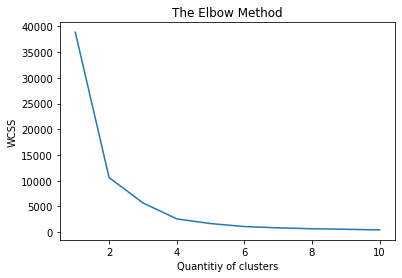

In [6]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Quantitiy of clusters')
plt.ylabel('WCSS')
plt.show()

4 seems to be the optimal choice here

In [11]:
# build a k-means model
ga_kmeans = KMeans(n_clusters=4)
ga_y_prediction = ga_kmeans.fit_predict(ga_X)

plt.scatter(x=,y=, ga_y_prediction)

TypeError: scatter() missing 1 required positional argument: 'y'

In [12]:
print(ga_y_prediction)

[1 1 1 1 3 1 3 1 2 3 2 3 2 1 3 1 3 1 0 3 3 1 0 3 0 3 0 3 3 1 2 1 0 1 0 1 0
 3 3 1 2 1 0 3 0 1 0 1 3 3 0 3 3 2 0 0 0 2 1 0 2 1 2 0 2 1 0 2 1 3 2 0 2 2
 2 1 0 3 1 0 2 3 2 0 1 0 0 1 3 0 2 1 0 3 3 1 0 1 0 1 1 0 2 1 0 1 2 0 2 2 2
 1 3 1 1 1 2 0 0 0 1 3 3 3 1 3 0 3 2 3 0 3 1 3 1 3 0 3 1 3 2 3 1 3 1 1 0 3
 3 3 0 3 0 3 0 1 3 3 3 3 2 3 1 3 0 3 0 3 3 3 3 1 3 3 0 3 2 1 2 3 3 3 0 3 3
 3 0 1 3 3 3 3 3 3 0 3 0 3 3 3]
